# Clustering algorithms in python

Sometimes, however, rather than making predictions, we instead want to categorize data into buckets. This is termed **unsupervised learning**.

## K-Means Clustering

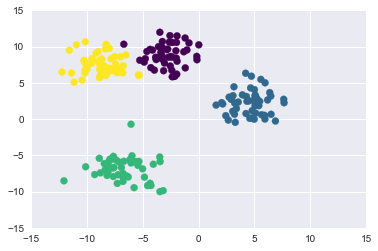

In [3]:
# import statements
%matplotlib inline

from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=42)

# create np array for data points
points = data[0]

# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15);

We have four colored clusters. 

The first step in k-means clustering is to select random centroids. Since our $k=4$ in this instance, we’ll need 4 random centroids

Next, we take each point and find the nearest centroid based on a distance measure (like Euclidean distance)

Now that we have 4 clusters, we find the new centroids of the clusters.

Then we match each point to the closest centroid again, repeating the process, until we can improve the clusters no more. 

This isn’t the result we wanted, but one way to combat this is with the k-means algorithm, which provides better initial seeding in order to find the best clusters. 

In [4]:
# import KMeans
from sklearn.cluster import KMeans

# create kmeans object
kmeans = KMeans(n_clusters=4)

# fit kmeans object to data
kmeans.fit(points)

# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)

# save new clusters for chart
y_km = kmeans.fit_predict(points)

[[-2.73756192  8.80555885]
 [-6.6786171  -6.89505223]
 [ 4.55059552  2.24512923]
 [-8.65709326  7.51452043]]


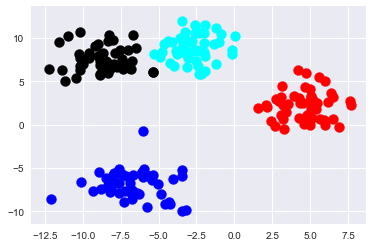

In [5]:
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='cyan');

## Agglomerative Hierarchical Clustering

Rather than choosing a number of clusters and starting out with random centroids, we instead begin with every point in our dataset as a “cluster.” Then we find the two closest points and combine them into a cluster. Then, we find the next closest points, and those become a cluster. We repeat the process until we only have one big giant cluster.

Along the way, we create what’s called a dendrogram. This is our “history.”

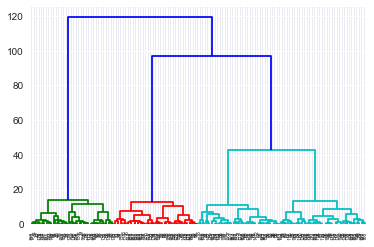

In [6]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))

# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

# save clusters for chart
y_hc = hc.fit_predict(points)

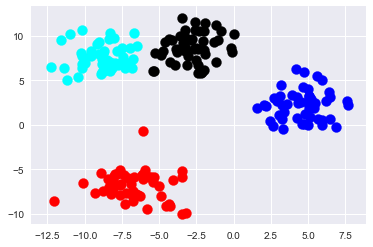

In [7]:
plt.scatter(points[y_hc ==0,0], points[y_hc == 0,1], s=100, c='red')
plt.scatter(points[y_hc==1,0], points[y_hc == 1,1], s=100, c='black')
plt.scatter(points[y_hc ==2,0], points[y_hc == 2,1], s=100, c='blue')
plt.scatter(points[y_hc ==3,0], points[y_hc == 3,1], s=100, c='cyan');

In general, the advantage of agglomerative hierarchical clustering is that it tends to produce more accurate results. The downside is that hierarchical clustering is more difficult to implement and more time/resource consuming than k-means.